In [1032]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

from PIL import Image


In [1033]:
def plot (arr_in):
    plt.imshow(arr_in, 'Greys')
    plt.show()

In [1034]:
def outer_product_3d(matrix1, matrix2):
    # Reshape matrix1 to (m, n, 1) and matrix2 to (1, p, q)
    return matrix1[:, :, np.newaxis] * matrix2[np.newaxis, :, :]

In [1035]:
class neuron ():
    def __init__(self, size) -> None:
        self.weights = np.random.rand(size)
        self.output = np.random.random(1)
        pass

    def __repr__(self) -> str:
        return f"Weights = {self.weights} \n\
            Current state = {self.output}"


first_neuron = neuron(10)
print(first_neuron)

Weights = [0.03881086 0.10416745 0.54026916 0.97093668 0.12615415 0.48656023
 0.95944336 0.08179887 0.92738514 0.5299445 ] 
            Current state = [0.05480086]


In [1036]:
class hopfield (): 
    def __init__(self, shape) -> None:
        # Set weights to range [-1,1)
        
        self.input_weights = np.identity(shape[1]) * 10 #np.full((shape[0], shape[1]), 1.0)
        self.internal_weights = np.random.rand(shape[0], shape[0], shape[0])
        #Avoid self-feedback
        np.fill_diagonal(self.internal_weights, 0)
        self.outputs = np.random.rand(shape[0],shape[1])*2 -1 
        self.learning_rate = 0.01
        self.hebb = np.zeros((shape[0], shape[0], shape[0]))

    def __repr__(self) -> str:
        return f"Internal weights: {self.internal_weights}\n\n\
            Current state: {self.outputs}"

    def update (self, input):
        #Behold! ReLU
        # print(f"Input shape: {input.shape}")
        # print(f"Input weights shape: {self.input_weights.shape}")
        input_activation = self.input_weights @ input

        # print(f"Internal weights shape: {self.internal_weights.shape}")
        # print(f"Ouputs shape: {self.outputs.shape}")
        self_activation = np.einsum('ijk,ij->ij', self.internal_weights, self.outputs)

        new_outputs =  input_activation + self_activation
        # print(f"New outputs: {new_outputs}")
        
        
        # hebb = new_outputs @ self.outputs.T #@ new_outputs.T #new_outputs @ self.outputs.T'
        self.hebb = outer_product_3d(new_outputs, self.outputs)
        # print(f"hebb shape: {self.hebb.shape}")
        self.internal_weights += self.hebb * self.learning_rate * -1
        # np.fill_diagonal(self.internal_weights, 0)
        
        self.internal_weights = np.clip(self.internal_weights, 0, None)
        self.input_weights = self.input_weights * 0.99

        self.outputs = np.clip(self.outputs, -1, 1)

    def visualize_weights (self):
        plt.imshow(self.internal_weights, 'Greys')

    def visualize_outputs (self):
        plt.imshow(self.outputs, 'Greys')

hop = hopfield([10,10])
# print(hop)
# hop.visualize_weights()

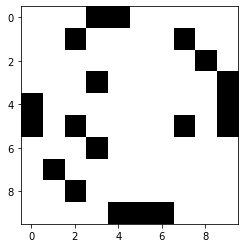

In [1037]:
for i in range (0, 100):
    hop.update(smily)
# hop.visualize_weights()
# print(f"Current weights: {hop.internal_weights}")
hop.visualize_outputs()
    
    

In [1038]:
print(hop.internal_weights)
print(hop.hebb)

[[[ 4.80381055e-04 -3.72131638e-01 -2.52041447e-01 -8.56685713e-01
    6.43699246e-01  8.73580583e-02 -3.02412442e-01 -3.53833829e-01
    6.10837344e-02  8.35129550e-01]
  [-9.81200561e-01  9.16596310e-01  2.06295097e-01 -9.83941137e-01
   -4.86895141e-01  2.85666120e-01 -9.76271472e-01  6.75501908e-02
    2.17400180e-01 -6.73937392e-01]
  [ 5.38495028e-01 -1.42268144e-01  4.96946958e-01 -5.72725380e-01
    6.73560154e-01  3.54450696e-01 -6.11488854e-01 -9.64494918e-02
   -6.97210356e-01 -6.49908884e-01]
  [-3.58336140e+00  5.77413926e-01 -3.67191307e-01 -5.88804651e-01
   -7.17618506e-02  3.41122396e-02 -3.16523756e+00 -2.42189676e-02
   -3.96110374e-01 -8.22984998e-01]
  [-1.03430355e+00 -3.89058891e-01 -7.40014833e-01  2.97948788e-01
   -7.77347650e-01 -3.38652719e-01 -1.32623391e-01  6.80941410e-02
   -1.42763732e+00 -1.60741884e+00]
  [-2.43319885e+00 -2.01130568e+00 -3.21183878e+00 -1.16296911e+00
   -1.39963588e+00 -5.41001400e-01 -9.31116806e-02 -2.84745786e+00
   -2.81336642e-

In [1044]:
print(hop.input_weights)

[[3.62372018 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.62372018 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         3.62372018 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         3.62372018 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         3.62372018 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         3.62372018
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  3.62372018 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         3.62372018 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         3.62372018 0.        ]
 [0.         0.         0.   

## Reconstruction
If the network has been successfully trained, it will re-form the learned pattern after distortion of state

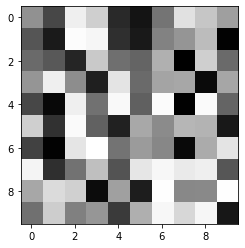

In [1040]:
hop.outputs = np.random.rand(10,10)
new_inputs = np.zeros((10,10))

hop.visualize_outputs()

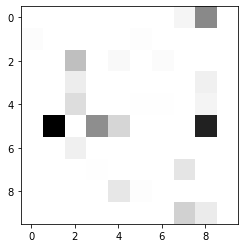

In [1057]:
for i in range (0,1):
    hop.update(new_inputs)
    hop.visualize_outputs()